<a href="https://colab.research.google.com/github/jasondupree/jasondupree.github.io/blob/main/ML_Linear_Regresssion_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook Preparation**

## Mount Drive and Update Display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)  # Ensures all columns are displayed
pd.set_option('display.width', None)        # Utilizes the maximum width of your display

from IPython.display import display, HTML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress ConvergenceWarning for this context
warnings.simplefilter('ignore', ConvergenceWarning)

## Import Data

In [ ]:
# Adjust the path to the location of your CSV file
file_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning/Projects/HW1/climate_change.csv'
climate_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
climate_df.head(3)

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning/Projects/HW1/baseball.csv'
baseball_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(baseball_df.head())

   Salary  AtBats  Hits  HmRuns  Runs  RBIs  Walks  Years  CareerAtBats  CareerHits  CareerHmRuns  \
0    7125     315    81       7    24    38     39     14          3449         835            69   
1    7200     479   130      18    66    72     76      3          1624         457            63   
2    7500     496   141      20    65    78     37     11          5628        1575           225   
3    1373     321    87      10    39    42     30      2           396         101            12   
4   11250     594   169       4    74    51     35     11          4408        1133            19   

   CareerRuns  CareerRBIs  CareerWalks  PutOuts  Assists  Errors League Division NewLeague  
0         321         414          375      632       43      10      N        W         N  
1         224         266          263      880       82      14      A        W         A  
2         828         838          354      200       11       3      N        C         N  
3          48        

# **Definitions**

## Definitions of Evaluation Metrics

R² (Coefficient of Determination)
- **R²** measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides an indication of the goodness of fit of a model. An R² value of 1 indicates perfect prediction, while an R² value of 0 indicates that the model predicts as well as the mean of the target variable.

In-Sample R²
- **In-Sample R²** refers to the R² score calculated on the same dataset that was used to train the model. It measures how well the model fits the training data.
  - *Example*: If a model trained on 2000-2010 weather data has an in-sample R² of 0.9, it means 90% of the variance in temperature during 2000-2010 is explained by the model.

Out-of-Sample R²
- **Out-of-Sample R²** is the R² score calculated on a separate dataset not used during training, often called the test set. It measures the model's predictive performance on new, unseen data.
  - *Example*: If the same model is tested on 2011-2015 weather data and has an out-of-sample R² of 0.75, it means 75% of the variance in temperature during 2011-2015 is explained by the model.

MSE (Mean Squared Error)
- **MSE** is the average of the squares of the errors between the predicted and actual values. It provides a measure of the quality of an estimator; the smaller the MSE, the closer the predicted values are to the actual values.

In-Sample MSE
- **In-Sample MSE** is calculated by comparing the model's predictions on the training set to the actual values in the training set. It measures the average squared difference between estimated values and actual value in the training dataset.
  - *Example*: If the in-sample MSE of our weather prediction model is 2, it means that, on average, the squared difference between the model’s temperature predictions and the actual temperatures during the training period is 2 degrees squared.

Out-of-Sample MSE
- **Out-of-Sample MSE** involves calculating the MSE for predictions made on data not included in the training set, typically the test set. It assesses how well the model predicts new, unseen data.
  - *Example*: An out-of-sample MSE of 3 for the weather prediction model indicates that, on average, the squared difference between the model’s predictions and the actual temperatures during the test period is 3 degrees squared.

MAE (Mean Absolute Error)
- **MAE** is the average of the absolute errors between the predicted and actual values. It provides a linear score that represents the average magnitude of the errors in a set of predictions, without considering their direction.

In-Sample MAE
- **In-Sample MAE** measures the average magnitude of the errors between the predictions and actual values within the training dataset. It quantifies how close the predictions are to the outcomes.
  - *Example*: An in-sample MAE of 1 degree means that, on average, the model’s temperature predictions during the training period are off by 1 degree from the actual temperatures.

Out-of-Sample MAE
- **Out-of-Sample MAE** is calculated by comparing the model’s predictions on the test set (or any other out-of-sample data) to the actual values of the test set. It indicates the average absolute error of predictions made on new, unseen data.
  - *Example*: An out-of-sample MAE of 1.5 degrees for the weather prediction model suggests that, on average, the model’s predictions during the test period are 1.5 degrees away from the actual temperatures.


# **Part A: Climate Change**



### **Problem A.1**

In this problem, we will attempt to study the relationship between average global tempera-
ture and several other environmental factors that affect the climate. The file (available on
Canvas) climate change.csv contains monthly climate data from May 1983 to December
2008. You can (and should) familiarize yourself with the data in Excel. A brief description
of all the variables can be found below.
Variable Description
Year Observation year
Month Observation month, given as a numerical value (1 = January, 2 =
February, 3 = March, etc.)
Temp Difference in degrees Celsius between the average global temperature
in that period, and a reference value
CO2, N2O, CH4,
CFC-11, CFC-12
Atmospheric concentrations of carbon dioxide (CO2), nitrous ox-
ide (N2O), methane (CH4), trichlorofluoromethane (CFC-11) and
dichlorodifluoromethane (CFC-12), respectively. CO2, N2O and CH4
are expressed in ppmv (parts per million by volume). CFC-11 and
CFC-12 are expressed in ppbv (parts per billion by volume).
Aerosols Mean stratospheric aerosol optical depth at 550 nm. This variable is
linked to volcanoes, as volcanic eruptions result in new particles being
added to the atmosphere, which affect how much of the sun’s energy is
reflected back into space.
TSI Total Solar Irradiance (TSI) in W/m2 (the rate at which the sun’s
energy is deposited per unit area). Due to sunspots and other solar
phenomena, the amount of energy that is given off by the sun varies
substantially with time.
MEI Multivariate El Nino Southern Oscillation index (MEI) – a measure of
the strength of the El Nino/La Nina-Southern Oscillation (a weather
effect in the Pacific Ocean that affects global temperatures).
We are interested in studying whether and how changes in environmental factors predict
future temperatures. To do this, first read the dataset climate change.csv into Python
(do not forget to place this file in the same folder, usually /current, on Colab as your
Python notebook). Then split the data into a training set, consisting of all the observations
up to and including 2002, and a test set consisting of the remaining years.

#### **Problem A.1(a)**

Build a linear regression model to predict the dependent variable Temp, using CO2, CH4, N2O, CFC-11, CFC-12, Aerosols, TSI and MEI as features (Year and Month
should NOT be used as features in the model). As always, use only the training set to train your model. What are the in-sample and out-of-sample R2, MSE, and MAE?

##### Functions

In [ ]:
# Resources
# https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/
# https://stackoverflow.com/questions/64021917/splitting-test-training-data-for-scikit
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://365datascience.com/resources-center/templates/train-and-test-split-with-sklearn-in-python/

# Base Functions

def split_data(df, target, split_year):
    """Split the data into training and test sets based on a specified year."""
    train_df = df[df['Year'] <= split_year]
    test_df = df[df['Year'] > split_year]
    return train_df, test_df

def prepare_features(df, features, target):
    """Prepare feature matrices and target vectors."""
    X = df[features]
    y = df[target]
    return X, y

def build_and_train_model(X_train, y_train):
    """Build and train a linear regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def make_predictions(model, X):
    """Use model to make predictions on given data."""
    predictions = model.predict(X)
    return predictions

def evaluate_model(y_true, predictions):
    """Evaluate the model's performance using R^2, MSE, and MAE."""
    r2 = r2_score(y_true, predictions)
    mse = mean_squared_error(y_true, predictions)
    mae = mean_absolute_error(y_true, predictions)
    return r2, mse, mae

def get_regression_coefficients(model, features):
    """Retrieve the regression coefficients from the model and match them to the features."""
    coefficients = model.coef_
    feature_coefficients = dict(zip(features, coefficients))
    return feature_coefficients

def run_full_workflow(df, features, target, split_year):
    """Run the full workflow from splitting the data to evaluating the model."""
    train_df, test_df = split_data(df, target, split_year)
    X_train, y_train = prepare_features(train_df, features, target)
    X_test, y_test = prepare_features(test_df, features, target)

    model = build_and_train_model(X_train, y_train)

    coefficients = get_regression_coefficients(model, features)
    print("Model Coefficients:")
    for feature, coef in coefficients.items():
        print(f"{feature}: {coef}")

    train_predictions = make_predictions(model, X_train)
    test_predictions = make_predictions(model, X_test)

    in_sample_eval = evaluate_model(y_train, train_predictions)
    out_of_sample_eval = evaluate_model(y_test, test_predictions)

    # Print Results
    print('')
    print('In-Sample Evaluation:')
    print(f'R^2: {in_sample_eval[0]}')
    print(f'MSE: {in_sample_eval[1]}')
    print(f'MAE: {in_sample_eval[2]}\n')

    print('Out-of-Sample Evaluation:')
    print(f'R^2: {out_of_sample_eval[0]}')
    print(f'MSE: {out_of_sample_eval[1]}')
    print(f'MAE: {out_of_sample_eval[2]}')

##### Execution

In [ ]:
# Parameters
df = climate_df
features = ['CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'Aerosols', 'TSI', 'MEI']
target = 'Temp'
split_year = 2002

# Run Composite Function
run_full_workflow(df, features, target, split_year)

Model Coefficients:
CO2: 0.006240775675446775
CH4: 0.0002621893537342572
N2O: -0.0348478074557769
CFC-11: -0.008871949503481122
CFC-12: 0.005484413031781651
Aerosols: -1.6503652223299037
TSI: 0.11939488977680172
MEI: 0.06590087644525276

In-Sample Evaluation:
R^2: 0.6920595959984922
MSE: 0.008731426409910665
MAE: 0.0726091861293869

Out-of-Sample Evaluation:
R^2: -0.5413255834025499
MSE: 0.01220697483513918
MAE: 0.09312747891277101


#### **Problem A.1(b)**

Build another linear regression model, this time with only N2O, Aerosols, TSI, and MEI as features. What are the in-sample and out-of-sample R2, MSE, and MAE?

In [ ]:
# Parameters
df = climate_df
features = ['N2O', 'Aerosols', 'TSI', 'MEI']
target = 'Temp'
split_year = 2002

# Run Composite Function
run_full_workflow(df, features, target, split_year)

Model Coefficients:
N2O: 0.024276120902004268
Aerosols: -1.724659707804915
TSI: 0.0857704601846565
MEI: 0.06549567580730808

In-Sample Evaluation:
R^2: 0.6490120806760422
MSE: 0.009952007429105646
MAE: 0.07666650280233138

Out-of-Sample Evaluation:
R^2: 0.20031861104556403
MSE: 0.006333308611894022
MAE: 0.06154027269393324


#### **Problem A.1(c)**

Between the two models built in parts (a) and (b), which performs better in-sample? Which performs better out-of-sample?

**Better Performance In-Sample**
*   Model 1 Performed Better
*   Rationale: Model 1 performed better on the training data with a higher R^2 (0.692) and lower MSE and MAE (0.00996 and 0.0726, respectively).
*   Note that Model 1 may be overfitting the training data, shown by the poor generalization to the test data - indicated by the negative R^2.

**Better Performance Out-of-Sample**
*   Model 2 Performed Better
*   Rationale: Model 2 performed better on the testing data with a less negative R^2 (-0.208) and lower MSE and MAE (0.00633 and 0.0615, respectively).

#### **Problem A.1(d)**

For each of the two models built in parts (a) and (b), what was the regression coefficient for the N2O feature, and how should this coefficient be interpreted?

**Model A.1(a) N20 Regression Coefficient**

*   **N2O:** -0.0348478074557769
*   **Interpretation:** Holding all other variables constant, a one-unit increase in N20 (atmospheric concentration of nitrous oxide) is associated with a decrease of 0.349 degress Celsius in the average global temperature. The negative sign suggests an inverse relationship between N20 concentration and temperature in this model.

**Model A.1(b) N20 Regression Coefficient**

*   **N2O:** 0.024276120902004268
*   **Interpretation:** Holding all other variables constant, a one-unit increase in N20 (atmospheric concentration of nitrous oxide) is associated with an increase of 0.024 degress Celsius in the average global temperature. The model suggests an direct relationship between N20 concentration and temperature in this model.

#### **Problem A.1(e)**

Given your responses to parts (c) and (d), which of the two models should you prefer to use moving forward?

Hint: The current scientific opinion is that N2O is a greenhouse gas – a higher concentration traps more heat from the sun, and thus contributes to the heating of the Earth.

Based on the above, **Model A.1(b) appears to be the better model**. Specifically, Model A.1(b) had a better out-of-sample R², which suggests it generalizes better to unseen data compared to Model A.1(a). Additionally, the inverse relationship for Model A.1(a) conflicts with our current scientific understanding that a higher concentration traps more heat from the sun, and thus contributes to the heating of the Earth.

# **Part B: Baseball Analytics**


Sport Analytics started with – and was popularized by – the data-driven approach to player assessment and team formation of the Oakland Athletics. In the 1990s, the “A’s” were one of the financially-poorest teams in Major League Baseball (MLB). Player selection was primarily done through scouting: baseball experts would watch high school and college games to identify future talent. Under the leadership of Billy Beane and Paul DePodesta, the A’s started to use data to identify undervalued players. Quickly, they met success on the field,
reaching the playoffs in 2002 and 2003 despite a much lower payroll than their competitors. This started a revolution in sports: analytics is now a central component of every team’s strategy.

In this problem, you will predict the salary of baseball players. The dataset in the included baseball.csv file contains information on 263 players. Each row represents a single player. The first column reports the players’ annual salaries (in $1,000s), which we aim to predict. The other columns contain four sets of variables: offensive statistics during the last season, offensive statistics over each player’s career, defensive statistics during the last season, and team information. These are described in the table below.

Read the baseball.csv file into Python. Note that three of the features are categorical (League, Division, and NewLeague) and thus need to be one-hot encoded. Do that before proceeding to the questions below.

## One-Hot Encode

In [ ]:
# One-hot encode the 'League', 'Division', and 'NewLeague' fields
baseball_df_encoded = pd.get_dummies(baseball_df, columns=['League', 'Division', 'NewLeague'], drop_first=False)

# Display the first few rows of the DataFrame
print(baseball_df.head(3))

   Salary  AtBats  Hits  HmRuns  Runs  RBIs  Walks  Years  CareerAtBats  CareerHits  CareerHmRuns  \
0    7125     315    81       7    24    38     39     14          3449         835            69   
1    7200     479   130      18    66    72     76      3          1624         457            63   
2    7500     496   141      20    65    78     37     11          5628        1575           225   

   CareerRuns  CareerRBIs  CareerWalks  PutOuts  Assists  Errors League Division NewLeague  
0         321         414          375      632       43      10      N        W         N  
1         224         266          263      880       82      14      A        W         A  
2         828         838          354      200       11       3      N        C         N  


## Problem B.1

Before building any machine learning models, explore the dataset: try plotting Salary against some features, one at a time. When you have identified a feature that you feel may be useful for predicting Salary, include that plot in your writeup, and comment on what you have observed in the plot (one sentence will suffice).

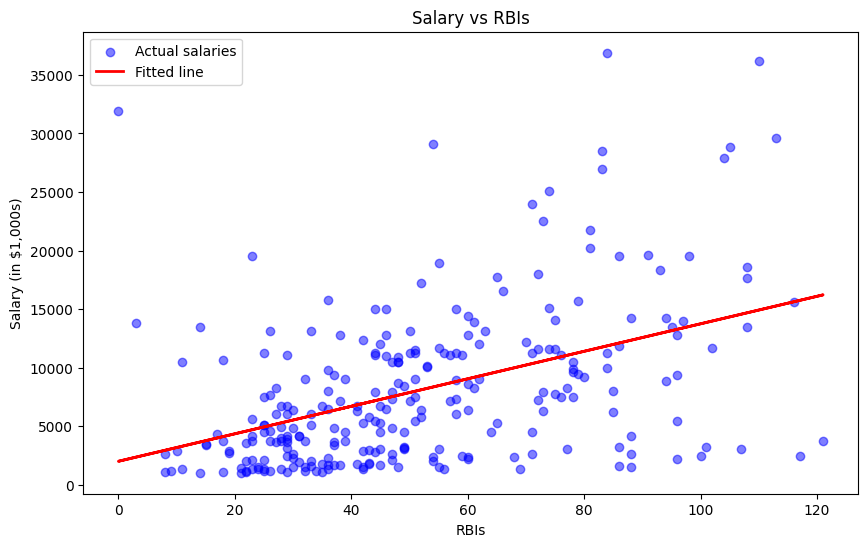

In [ ]:
# Selecting 'RBIs' and 'Salary' for the scatter plot
X = baseball_df_encoded[['RBIs']]  # Predictor
y = baseball_df_encoded['Salary']  # Response

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate the y-values of the regression line for the original X values
y_pred = model.predict(X)

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual salaries')
plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted line')

# Adding title and labels
plt.title('Salary vs RBIs')
plt.xlabel('RBIs')
plt.ylabel('Salary (in $1,000s)')
plt.legend()

# Display the plot
plt.show()

There is a distinct, direct correlation between RBIs and Salary. As one goes up, so does the other. While this only shows correlation and not causation, conventional wisdom would suggest that more RBIs result in a higher Salary.

## Problem B.2

Split the data into a training set (70%) and test set (30%). Train an “ordinary” linear regression model (i.e. no regularization), and report the following:

### Functions

In [ ]:
def split_data(df, test_size):
    """Split the data into training and test sets based on a specified proportion."""
    # Assuming that the target variable 'Salary' is the last column
    X = df.drop('Salary', axis=1)
    y = df['Salary']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

def build_and_train_model(X_train, y_train):
    """Build and train a linear regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, features, X_train, y_train, X_test, y_test):
    """Evaluate the model's performance and print metrics for both training and test sets."""
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluation metrics
    in_sample_r2 = r2_score(y_train, train_predictions)
    out_of_sample_r2 = r2_score(y_test, test_predictions)
    in_sample_mse = mean_squared_error(y_train, train_predictions)
    out_of_sample_mse = mean_squared_error(y_test, test_predictions)
    in_sample_mae = mean_absolute_error(y_train, train_predictions)
    out_of_sample_mae = mean_absolute_error(y_test, test_predictions)

    # Print Results
    print('In-Sample Evaluation:')
    print(f'R^2: {in_sample_r2}')
    print(f'MSE: {in_sample_mse}')
    print(f'MAE: {in_sample_mae}\n')

    print('Out-of-Sample Evaluation:')
    print(f'R^2: {out_of_sample_r2}')
    print(f'MSE: {out_of_sample_mse}')
    print(f'MAE: {out_of_sample_mae}')

    # RBIs Feature Check
    if 'RBIs' in features:
        feature_index = features.index('RBIs')
        rbi_coefficient = model.coef_[feature_index]
        print(f"\nCoefficient for 'RBIs': {rbi_coefficient}")
        print("Interpretation: An increase of one RBI is associated with a change in salary by approximately",
              f"{rbi_coefficient:.2f} thousand dollars.")
    else:
        print("RBIs feature not used in the model.")

    # Isolated Interpretations
    print("\nIsolated Interpretations (based on original division codes):")

    # Calculating coefficients for 'Division_W', 'Division_E', and 'Division_C'
    division_w_index = features.index('Division_W') if 'Division_W' in features else None
    division_e_index = features.index('Division_E') if 'Division_E' in features else None
    division_c_index = features.index('Division_C') if 'Division_C' in features else None

    if division_w_index is not None and division_e_index is not None:
        east_to_west_effect = model.coef_[division_w_index] - model.coef_[division_e_index]
        print(f"\n(a) Moving from East to West is approximated by a salary change of approximately {east_to_west_effect:.2f} thousand dollars.")

    if division_w_index is not None and division_c_index is not None:
        west_to_central_effect = model.coef_[division_c_index] - model.coef_[division_w_index]
        print(f"\n(b) Moving from West to Central is approximated by a salary change of approximately {west_to_central_effect:.2f} thousand dollars.")

    if division_e_index is not None and division_c_index is not None:
        central_to_east_effect = model.coef_[division_e_index] - model.coef_[division_c_index]
        print(f"\n(c) Moving from Central to East is approximated by a salary change of approximately {central_to_east_effect:.2f} thousand dollars.")

### Execution

In [ ]:
# Parameters

# Remove Salary from Features since this is the Target Variable
features = baseball_df_encoded.drop(columns=['Salary']).columns.tolist()

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = split_data(baseball_df_encoded, test_size=0.3)

# Building and training the model
model = build_and_train_model(X_train, y_train)

# Pass 'features' to 'evaluate_model'
evaluate_model(model, features, X_train, y_train, X_test, y_test)

In-Sample Evaluation:
R^2: 0.6148476067742332
MSE: 16076750.768579276
MAE: 3071.813939986548

Out-of-Sample Evaluation:
R^2: 0.39290682076036654
MSE: 33170501.784535673
MAE: 3645.968501154961

Coefficient for 'RBIs': -43.839079206611736
Interpretation: An increase of one RBI is associated with a change in salary by approximately -43.84 thousand dollars.

Isolated Interpretations (based on original division codes):

(a) Moving from East to West is approximated by a salary change of approximately -2544.08 thousand dollars.

(b) Moving from West to Central is approximated by a salary change of approximately 1138.14 thousand dollars.

(c) Moving from Central to East is approximated by a salary change of approximately 1405.94 thousand dollars.


### Problem B.2(a)

The in-sample and out-of-sample R2:

**In-Sample R^2:** 0.6148476067742331

**Out-of-Sample R^2:** 0.3929068207603682

### Problem B.2(b)

The value of the coefficient for the feature you identified in question B.1, and an interpretation of that value.

**Coefficient for 'RBIs':** -43.83907920661159

**Direct Interpretation:** An increase of one RBI is associated with a change in salary by approximately -43.84 thousand dollars.

**Indirect Interpretation:** Based on the initial chart I created, showing a positive relationship between RBIs and Salary, my hypothesis is that there is some feature interaction that's skewing the results. Additionally, I reran the data, limiting the Features to only 'RBIs' and I got a Coefficient of 123.479, which makes much more sense.

### Problem B.2(c)

The effect on salary that your model predicts for a player that switches divisions from East to West.

**Coefficient:** -2544.08

**Interpretation:** Moving from East to West is approximated by a salary change of approximately -2544.08 thousand dollars.

### Problem B.2(d)

The effect on salary that your model predicts for a player that switches divisions from West to Central.

**Coefficient:** 1138.14

**Interpretation:** Moving from West to Central is approximated by a salary change of approximately 1138.14 thousand dollars.

### Problem B.2(e)

The effect on salary that your model predicts for a player that switches divisions from Central to East.

**Coefficient:** 1405.94

**Interpretation:** Moving from Central to East is approximated by a salary change of approximately 1405.94 thousand dollars.

## Problem B.3

Train a model using ridge regression with 10-fold cross-validation to select the tuning parameter. The choice of which tuning parameters to try is up to you (this does not mean there is not a wrong answer). Report the following:

| Variable      | Description                                         |
|---------------|-----------------------------------------------------|
| Salary        | The player’s annual salary (in $1,000s)             |
| AtBats        | Number of at bats this season                       |
| Hits          | Number of hits this season                          |
| HmRuns        | Number of home runs this season                     |
| Runs          | Number of runs this season                          |
| RBIs          | Number of runs batted in this season                |
| Walks         | Number of walks this season                         |
| Years         | Number of years in MLB                              |
| CareerAtBats  | Number of at bats over career                       |
| CareerHits    | Number of hits over career                          |
| CareerHmRuns  | Number of home runs over career                     |
| CareerRuns    | Number of runs over career                          |
| CareerRBIs    | Number of runs batted in over career                |
| CareerWalks   | Number of walks over career                         |
| PutOuts       | Number of putouts this season                       |
| Assists       | Number of assists this season                       |
| Errors        | Number of errors this season                        |
| League        | League in which player plays (N=National, A=American)|
| Division      | Division in which player plays (E=East, C=Central, W=West)|
| NewLeague     | League in which player plays next year (N=National, A=American)|


### Attempt 1 to identify optimal alpha value using a range of values to test.

In [ ]:
# Splitting the data into training and testing sets
X = baseball_df_encoded.drop(columns=['Salary'])
y = baseball_df_encoded['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Specify a range of alpha values for Ridge and Lasso
alphas_ridge = np.logspace(-4, 4, 50)
alphas_lasso = np.logspace(-10, 10, 100)

# Ridge regression with cross-validation
ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict and evaluate for Ridge
y_test_pred_ridge = ridge_cv.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_test_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_test_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_test_pred_ridge)

print("Ridge - Out-of-sample R2:", ridge_r2)
print("Ridge - MSE:", ridge_mse)
print("Ridge - MAE:", ridge_mae)
print("Ridge - Optimal value of alpha:", ridge_cv.alpha_)

# Lasso regression with cross-validation
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# Predict and evaluate for Lasso
y_test_pred_lasso = lasso_cv.predict(X_test_scaled)
lasso_r2 = r2_score(y_test, y_test_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_test_pred_lasso)

print("Lasso - Out-of-sample R2:", lasso_r2)
print("Lasso - MSE:", lasso_mse)
print("Lasso - MAE:", lasso_mae)
print("Lasso - Optimal value of alpha:", lasso_cv.alpha_)

Ridge - Out-of-sample R2: 0.36151902541723724
Ridge - MSE: 34885475.62552977
Ridge - MAE: 3743.699406608389
Ridge - Optimal value of alpha: 159.98587196060572
Lasso - Out-of-sample R2: 0.38462612809432906
Lasso - MSE: 33622944.2435335
Lasso - MAE: 3670.077584833071
Lasso - Optimal value of alpha: 83.02175681319736


### Attempt 2 to identify optimal alpha value using for loop.

In [ ]:
# Resources
# https://medium.com/nerd-for-tech/lasso-and-ridge-regularization-simply-explained-d551ee1e47b7
# https://www.geeksforgeeks.org/prediction-using-columntransformer-onehotencoder-and-pipeline/
# https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/

# Separate features and target variable for 'baseball_df_encoded'
X_encoded = baseball_df_encoded.drop(columns=['Salary'])
y_encoded = baseball_df_encoded['Salary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Identify categorical and numerical columns in 'X_train'
categorical_cols_encoded = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols_encoded = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical and categorical data
preprocessor_encoded = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_encoded),
        ('cat', OneHotEncoder(), categorical_cols_encoded)
    ])

# Define the models with the preprocessor in a Pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor_encoded),
    ('regressor', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor_encoded),
    ('regressor', Lasso(max_iter=10000))  # Increased max_iter for convergence
])

# Cross-validation setup
kf_encoded = KFold(n_splits=10, shuffle=True, random_state=42)
alpha_values_ridge = np.logspace(-4, 4, 50)
alpha_values_lasso = np.logspace(-4, 4, 50)  # Adjusted range for practicality

# Find the best alpha for Ridge
best_score_ridge = -np.inf
best_alpha_ridge = None

# Needed to use OpenAI for this section
for alpha in alpha_values_ridge:
    ridge_pipeline.set_params(regressor__alpha=alpha)
    scores_ridge = cross_val_score(ridge_pipeline, X_train, y_train, cv=kf_encoded, scoring='r2')
    mean_score_ridge = scores_ridge.mean()
    if mean_score_ridge > best_score_ridge:
        best_score_ridge = mean_score_ridge
        best_alpha_ridge = alpha

# Retrain Ridge on the entire training set with the best alpha
ridge_pipeline.set_params(regressor__alpha=best_alpha_ridge)
ridge_pipeline.fit(X_train, y_train)

# In-sample R^2 score for Ridge
in_sample_r2_ridge = ridge_pipeline.score(X_train, y_train)

# Evaluate Ridge on the test set
y_pred_ridge_test = ridge_pipeline.predict(X_test)
out_of_sample_r2_ridge = r2_score(y_test, y_pred_ridge_test)

# Number of features with non-zero coefficients in Ridge
non_zero_coef_ridge = np.sum(ridge_pipeline.named_steps['regressor'].coef_ != 0)

# Ridge Evaluation on the Test Set
y_pred_ridge_test = ridge_pipeline.predict(X_test)
out_of_sample_r2_ridge = r2_score(y_test, y_pred_ridge_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge_test)

# Print Ridge results
print("Ridge Regression Results (Test Set):")
print("In-sample R^2:", in_sample_r2_ridge)
print("Out-of-sample R^2:", out_of_sample_r2_ridge)
print("MSE:", mse_ridge)
print("MAE:", mae_ridge)
print("Best alpha:", best_alpha_ridge)
print("Number of features with non-zero coefficients:", non_zero_coef_ridge)

# Find the best alpha for LASSO
best_score_lasso = -np.inf
best_alpha_lasso = None

# Used OpenAI for this for loop
for alpha in alpha_values_lasso:
    lasso_pipeline.set_params(regressor__alpha=alpha)
    scores_lasso = cross_val_score(lasso_pipeline, X_train, y_train, cv=kf_encoded, scoring='r2')
    mean_score_lasso = scores_lasso.mean()
    if mean_score_lasso > best_score_lasso:
        best_score_lasso = mean_score_lasso
        best_alpha_lasso = alpha

# Retrain LASSO on the entire training set with the best alpha
lasso_pipeline.set_params(regressor__alpha=best_alpha_lasso)
lasso_pipeline.fit(X_train, y_train)

# In-sample R^2 score for LASSO
in_sample_r2_lasso = lasso_pipeline.score(X_train, y_train)

# Evaluate LASSO on the test set
y_pred_lasso_test = lasso_pipeline.predict(X_test)
out_of_sample_r2_lasso = r2_score(y_test, y_pred_lasso_test)

# Number of features with non-zero coefficients in LASSO
non_zero_coef_lasso = np.sum(lasso_pipeline.named_steps['regressor'].coef_ != 0)

# LASSO Evaluation on the Test Set
y_pred_lasso_test = lasso_pipeline.predict(X_test)
out_of_sample_r2_lasso = r2_score(y_test, y_pred_lasso_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso_test)

# Print LASSO results
print("\nLASSO Regression Results (Test Set):")
print("In-sample R^2:", in_sample_r2_lasso)
print("Out-of-sample R^2:", out_of_sample_r2_lasso)
print("MSE:", mse_lasso)
print("MAE:", mae_lasso)
print("Best alpha:", best_alpha_lasso)
print("Number of features with non-zero coefficients:", non_zero_coef_lasso)

Ridge Regression Results (Test Set):
In-sample R^2: 0.5275529036892869
Out-of-sample R^2: 0.36151902541723724
MSE: 34885475.62552977
MAE: 3743.699406608389
Best alpha: 159.98587196060572
Number of features with non-zero coefficients: 23

LASSO Regression Results (Test Set):
In-sample R^2: 0.5506246232220245
Out-of-sample R^2: 0.37425083032262474
MSE: 34189832.235394076
MAE: 3681.865196942623
Best alpha: 232.99518105153672
Number of features with non-zero coefficients: 11


### Problem B.3(a)

The in-sample and out-of-sample R2

**Ridge In-Sample R^2:** 0.5275529036892869

**Ridge Out-of-Sample R^2:** 0.36151902541723724

### Problem B.3(b)

The final value of the tuning parameter (i.e. after cross-validation)

**Ridge Best Alpha:** 232.99518105153672

### Problem B.3(c)

The value of the coefficient for the feature you identified in question 1, and an interpretation of that value. Compared to your model from question 2, has this feature become more or less “important”?

In [ ]:
# Find the index of 'RBIs' in the preprocessed features
rbi_index = numerical_cols_encoded.index('RBIs')

# For Ridge
# Coefficient for RBIs in the Ridge model
ridge_rbi_coef = ridge_pipeline.named_steps['regressor'].coef_[rbi_index]
print("Ridge Regression RBI Coefficient:", ridge_rbi_coef)

# For LASSO
# Coefficient for RBIs in the LASSO model
lasso_rbi_coef = lasso_pipeline.named_steps['regressor'].coef_[rbi_index]
# print("LASSO Regression RBI Coefficient:", lasso_rbi_coef)

Ridge Regression RBI Coefficient: 310.63425673560783


Holding all other variables constant, a single unit increase in RBIs is associated with an increases of approximately 310.63 units in player's salary.

### Problem B.3(d)

Of the two models so far, which one should be used moving forward?

So far, the first Model (B.2) is actually performing better than the second Model (B.3) in terms of both In-Sample R^2 and Out-of-Sample R^2. In both in-sample and out-of-sample, R^2 is higher, indicating it explains the training data variance better than the second model. Note that Model 1 had an out-of-sample R^2 of 0.393 while Model 2 had an out-of-sample R^2 of 0.362. In-Sample for Model 1 also had a 9 point advantage.

## Problem B.4

Train a model using LASSO with 10-fold cross-validation to select the tuning parameter. The choice of which tuning parameters to try is up to you (this does not mean there is not a wrong answer). Report the following:

### Problem B.4(a)

The in-sample and out-of-sample R2

**Lasso In-Sample R^2:** 0.5506246232220245

**Lasso Out-of-Sample R^2:** 0.37425083032262474

### Problem B.4(b)

The final value of the tuning parameter (i.e. after cross-validation)

**Lasso Best Alpha:** 232.99518105153672

### Problem B.4(c)

The number of features with non-zero coefficients (Hint: there should be at least one feature with coefficient equal to 0)

**Number of features with non-zero coefficients:** 11

### Problem B.4(d)

Of the three models so far, which one should be used moving forward?

Based on the results, the first Model (B.2) is actually performing better than the second (B.3 - Ridge) and third (B.4 - Lasso) in terms of both In-Sample R^2 and Out-of-Sample R^2. In both in-sample and out-of-sample, R^2 is higher for Model 1, indicating it explains the training data variance better than the second model. Note that Model 1 had an out-of-sample R^2 of 0.393 while Models 2 and 3 had an out-of-sample R^2 of 0.362 and 0.374, respectively.